In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path as Path

In [4]:
edx_courses = pd.read_csv('C://Users/Radhika/Desktop/edx_courses.csv')

In [5]:
edx_courses.head(3)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...


In [7]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [8]:
#Data transformation and manipulation
edx_courses['price'] = edx_courses['price'].str.replace('FREE-Add a Verified Certificate for','')
edx_courses['price'] = edx_courses['price'].str.replace('$','')
edx_courses['price'] = edx_courses['price'].str.replace('USD','')

C:\Users\Radhika\AppData\Local\Temp/ipykernel_5672/2637818247.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  edx_courses['price'] = edx_courses['price'].str.replace('$','')


In [9]:
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].str.replace(',','')

In [11]:
edx_courses['course_length'] = edx_courses['course_length'].str.replace('Weeks', '')

In [12]:
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].fillna(0)

In [13]:
edx_courses['n_enrolled'] = edx_courses['n_enrolled'].astype(int)

In [14]:
edx_courses['price'] = edx_courses['price'].astype(float)

In [15]:
edx_courses['course_length'] = edx_courses['course_length'].astype(int)

In [16]:
edx_courses.isna().sum()

title                   0
summary                53
n_enrolled              0
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [19]:
edx_courses['summary'] = edx_courses['summary'].fillna('Unlisted')
edx_courses['instructors'] = edx_courses['instructors'].fillna('Unlisted')
edx_courses['subtitles'] = edx_courses['subtitles'].fillna('English')
edx_courses['course_description'] = edx_courses['course_description'].fillna('Unlisted')
edx_courses['course_syllabus'] = edx_courses['course_syllabus'].fillna('Unlisted')

In [20]:
edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2,49.0,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7,49.0,This course aims to teach everyone the basics ...,Unlisted,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,90.0,"This is CS50x , Harvard University's introduct...",Unlisted,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13,199.0,"In the last decade, the amount of data availab...",Unlisted,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4,249.0,Begin your journey in a new career in marketin...,Unlisted,https://www.edx.org/course/marketing-analytics...


In [21]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               975 non-null    object 
 1   summary             975 non-null    object 
 2   n_enrolled          975 non-null    int32  
 3   course_type         975 non-null    object 
 4   institution         975 non-null    object 
 5   instructors         975 non-null    object 
 6   Level               975 non-null    object 
 7   subject             975 non-null    object 
 8   language            975 non-null    object 
 9   subtitles           975 non-null    object 
 10  course_effort       975 non-null    object 
 11  course_length       975 non-null    int32  
 12  price               975 non-null    float64
 13  course_description  975 non-null    object 
 14  course_syllabus     975 non-null    object 
 15  course_url          975 non-null    object 
dtypes: float

In [22]:
del edx_courses['course_url']

In [24]:
edx_courses['Level'] = edx_courses['Level'].astype('category')

In [25]:
edx_courses['course_type'] = edx_courses['course_type'].astype('category')
edx_courses['course_type'] = edx_courses['course_type'].cat.codes

In [26]:
edx_courses.dtypes

title                   object
summary                 object
n_enrolled               int32
course_type               int8
institution             object
instructors             object
Level                 category
subject                 object
language                object
subtitles               object
course_effort           object
course_length            int32
price                  float64
course_description      object
course_syllabus         object
dtype: object

In [27]:
edx_courses.describe()

,n_enrolled,course_type,course_length,price
count,9.750000e+02,975.000000,975.000000,975.000000
mean,4.670523e+04,0.940513,6.705641,100.465497
std,1.128239e+05,0.236656,3.150327,69.572175
min,0.000000e+00,0.000000,1.000000,5.000000
25%,8.529500e+03,1.000000,4.000000,49.000000
50%,1.968700e+04,1.000000,6.000000,79.000000
75%,4.891850e+04,1.000000,8.000000,149.000000
max,2.442271e+06,1.000000,18.000000,450.000000


In [28]:
edx_courses['Level'] = edx_courses['Level'].cat.codes

In [29]:
edx_courses.describe()

,n_enrolled,course_type,Level,course_length,price
count,9.750000e+02,975.000000,975.000000,975.000000,975.000000
mean,4.670523e+04,0.940513,1.547692,6.705641,100.465497
std,1.128239e+05,0.236656,0.653165,3.150327,69.572175
min,0.000000e+00,0.000000,0.000000,1.000000,5.000000
25%,8.529500e+03,1.000000,1.000000,4.000000,49.000000
50%,1.968700e+04,1.000000,2.000000,6.000000,79.000000
75%,4.891850e+04,1.000000,2.000000,8.000000,149.000000
max,2.442271e+06,1.000000,2.000000,18.000000,450.000000


In [30]:
edx_courses['subject'].value_counts()

Computer Science                166
Business & Management           164
Data Analysis & Statistics       72
Humanities                       64
Engineering                      58
Social Sciences                  51
Economics & Finance              46
Communication                    39
Biology & Life Sciences          35
Language                         34
Math                             31
Medicine                         31
Education & Teacher Training     29
History                          20
Physics                          18
Environmental Studies            16
Art & Culture                    12
Health & Safety                  11
Law                              10
Science                          10
Design                            8
Energy & Earth Sciences           8
Electronics                       7
Music                             7
Food & Nutrition                  6
Philosophy & Ethics               6
Chemistry                         5
Architecture                

In [31]:
#Connecting SQL
Path('edx_courses.db').touch()
edx_conn = sqlite3.connect('edx_courses.db')
edx_cursor = edx_conn.cursor()

In [32]:
edx_courses.to_sql('edx_courses',edx_conn,if_exists='append',index=False)

In [33]:
#Querying edx_courses data
edx_courses_init_query = pd.read_sql('''SELECT * FROM edx_courses''',edx_conn)
edx_courses_init_query

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus
0,How to Learn Online,Learn essential strategies for successful onli...,124980,1,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,2,Education & Teacher Training,English,English,2–3 hours per week,2,49.0,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,1,The University of Michigan,Charles Severance,2,Computer Science,English,English,2–4 hours per week,7,49.0,This course aims to teach everyone the basics ...,Unlisted
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,1,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,2,Computer Science,English,English,6–18 hours per week,12,90.0,"This is CS50x , Harvard University's introduct...",Unlisted
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,0,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,1,Data Analysis & Statistics,English,English,10–15 hours per week,13,199.0,"In the last decade, the amount of data availab...",Unlisted
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,1,"University of California, Berkeley",Stephan Sorger,2,Computer Science,English,English,5–7 hours per week,4,249.0,Begin your journey in a new career in marketin...,Unlisted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",0,1,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,1,Social Sciences,English,English,4–5 hours per week,10,25.0,The high rates of crime and violence are two o...,Unlisted
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,0,1,Tsinghua University,Yuehua Nie,2,Art & Culture,中文,"English, 中文",3–5 hours per week,12,139.0,Are you an original designer? Or a DIY fancier...,Unlisted
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,1,École polytechnique fédérale de Lausanne,Wulfram Gerstner,0,Biology & Life Sciences,English,English,4–6 hours per week,6,139.0,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,1,SDG Academy,Jeffrey D. Sachs,2,Environmental Studies,English,English,1–2 hours per week,1,25.0,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...


In [34]:
#Querying data where subject is Data Analysis & Statistics
data_analysis_query = pd.read_sql('''SELECT title,price,course_effort,n_enrolled,institution from
                                        edx_courses where subject == 'Data Analysis & Statistics' order by price desc LIMIT 15''',edx_conn)
data_analysis_query

,title,price,course_effort,n_enrolled,institution
0,Python for Data Science,350.0,8–10 hours per week,266978,"The University of California, San Diego"
1,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
2,Machine Learning Fundamentals,350.0,8–10 hours per week,82008,"The University of California, San Diego"
3,Probability - The Science of Uncertainty and Data,300.0,10–14 hours per week,205615,Massachusetts Institute of Technology
4,Statistics and R,249.0,2–4 hours per week,314586,Harvard University
5,Data Analytics and Visualization in Health Care,249.0,8–10 hours per week,7304,Rochester Institute of Technology
6,The Analytics Edge,199.0,10–15 hours per week,129555,Massachusetts Institute of Technology
7,"Data Science for Construction, Architecture an...",199.0,4–6 hours per week,11113,The National University of Singapore
8,Probability and Statistics I: A Gentle Introd...,199.0,6–10 hours per week,0,The Georgia Institute of Technology
9,Image Processing and Analysis for Life Scientists,199.0,2–3 hours per week,8621,École polytechnique fédérale de Lausanne


<AxesSubplot:xlabel='price', ylabel='title'>

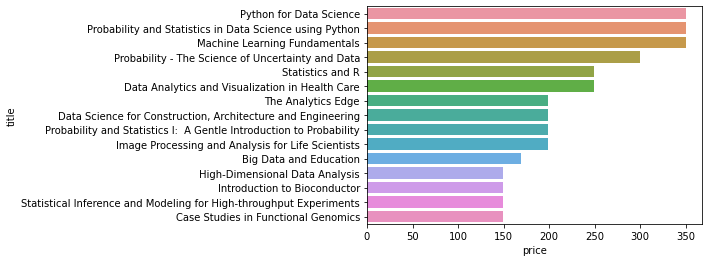

In [35]:
sns.barplot(x='price',y='title',data=data_analysis_query)

<AxesSubplot:xlabel='n_enrolled', ylabel='title'>

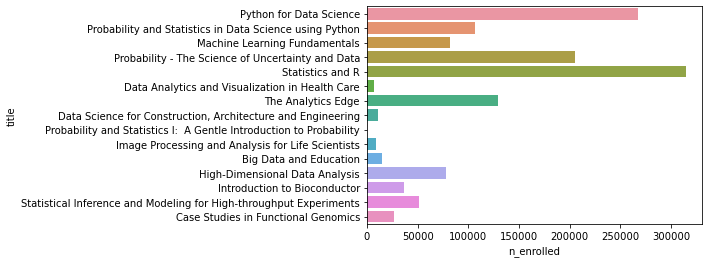

In [36]:
sns.barplot(x='n_enrolled',y='title',data=data_analysis_query)

<AxesSubplot:xlabel='price', ylabel='n_enrolled'>

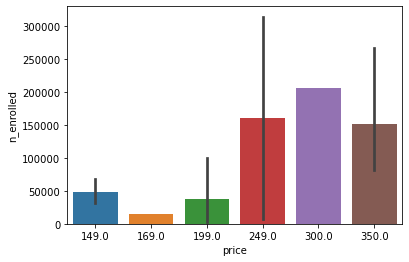

In [38]:
sns.barplot(x='price',y='n_enrolled',data=data_analysis_query)

In [39]:
data_analysis_query.mean()

C:\Users\Radhika\AppData\Local\Temp/ipykernel_5672/2810120541.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_analysis_query.mean()


price           227.266667
n_enrolled    89348.533333
dtype: float64

In [41]:
#Querying data where title includes SQL
data_analysis_sql = pd.read_sql('''Select title,price,course_effort,n_enrolled,institution from edx_courses where title like '%sql%' order by price desc''',edx_conn)
data_analysis_sql

,title,price,course_effort,n_enrolled,institution
0,Databases: Relational Databases and SQL,50.0,8–10 hours per week,20502,Stanford University
1,Databases: Advanced Topics in SQL,50.0,8–10 hours per week,0,Stanford University
2,SQL for Data Science,39.0,2–4 hours per week,39184,IBM
3,SQL aplicado en la ciencia de datos,39.0,2–4 hours per week,0,IBM


<AxesSubplot:xlabel='n_enrolled', ylabel='title'>

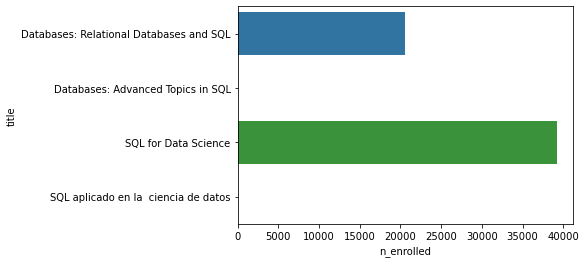

In [43]:
sns.barplot(x='n_enrolled',y='title',data=data_analysis_sql)

In [44]:
# Querying data where title includes Python
data_analysis_python = pd.read_sql('''Select title,price,course_effort,n_enrolled,institution from edx_courses where title like '%Python' order by price desc''',edx_conn)
data_analysis_python

,title,price,course_effort,n_enrolled,institution
0,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
1,Analytics in Python,249.0,8–10 hours per week,82210,Columbia University
2,CS50's Introduction to Artificial Intelligence...,199.0,10–30 hours per week,258006,Harvard University
3,Data Science: Computational Thinking with Python,199.0,4–6 hours per week,78232,"University of California, Berkeley"
4,Estructuras de Datos con Python,49.0,2–4 hours per week,0,The University of Michigan
5,Advanced Algorithmics and Graph Theory with Py...,49.0,2–4 hours per week,13502,IMT
6,Analyzing Data with Python,39.0,2–4 hours per week,94079,IBM
7,Visualizing Data with Python,39.0,2–4 hours per week,42101,IBM


<AxesSubplot:xlabel='n_enrolled', ylabel='title'>

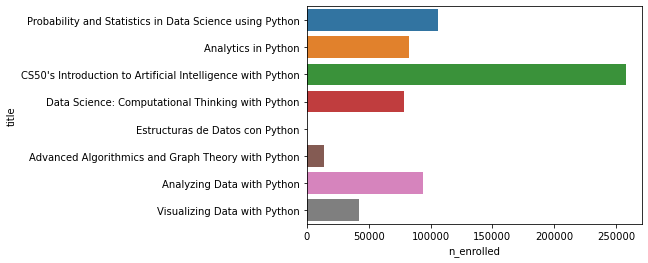

In [45]:
sns.barplot(x='n_enrolled',y='title',data=data_analysis_python)

In [46]:
# Querying record where title includes Statistics
data_analysis_stat = pd.read_sql('''Select title,price,course_effort,n_enrolled,institution from edx_courses where title like '%Statistics' order by price desc''',edx_conn)
data_analysis_stat

,title,price,course_effort,n_enrolled,institution
0,BioStatistics,79.0,5–10 hours per week,14937,Doane University
1,MathTrackX: Statistics,79.0,3–6 hours per week,0,University of Adelaide
2,Compilation Basics for Macroeconomic Statistics,25.0,3–6 hours per week,6570,The International Monetary Fund
3,Public Sector Debt Statistics,25.0,6–8 hours per week,0,The International Monetary Fund


<AxesSubplot:xlabel='n_enrolled', ylabel='title'>

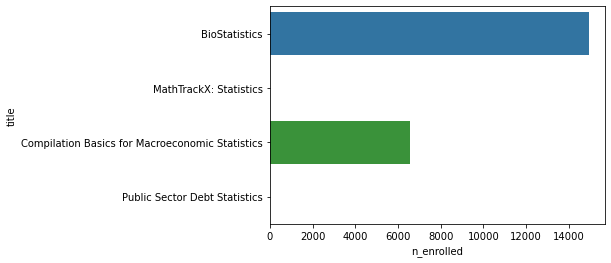

In [48]:
sns.barplot(x='n_enrolled',y='title',data=data_analysis_stat)

In [52]:
#Subject : Computer Science
comp_sci_query = pd.read_sql('''Select title,price,n_enrolled,course_effort,institution
                                    from edx_courses where subject == 'Computer Science' order by price desc limit 15''',edx_conn)
comp_sci_query

,title,price,n_enrolled,course_effort,institution
0,Information Technology Foundations,399.6,6388,9–10 hours per week,Western Governors University
1,Driving Digital Innovation through Experimenta...,399.0,16904,3–5 hours per week,Boston University
2,Machine Learning with Python: from Linear Mode...,300.0,85561,10–14 hours per week,Massachusetts Institute of Technology
3,Network and Security Foundations,299.7,7301,9–10 hours per week,Western Governors University
4,Scripting and Programming Foundations,299.7,0,9–10 hours per week,Western Governors University
5,Cloud Computing for Enterprises,299.0,27241,8–10 hours per week,University System of Maryland-University of Ma...
6,Marketing Analytics: Marketing Measurement Str...,249.0,81140,5–7 hours per week,"University of California, Berkeley"
7,Marketing Analytics: Competitive Analysis and ...,249.0,70682,5–7 hours per week,"University of California, Berkeley"
8,Artificial Intelligence (AI),249.0,265104,8–10 hours per week,Columbia University
9,Machine Learning,249.0,150855,8–10 hours per week,Columbia University


<AxesSubplot:xlabel='n_enrolled', ylabel='title'>

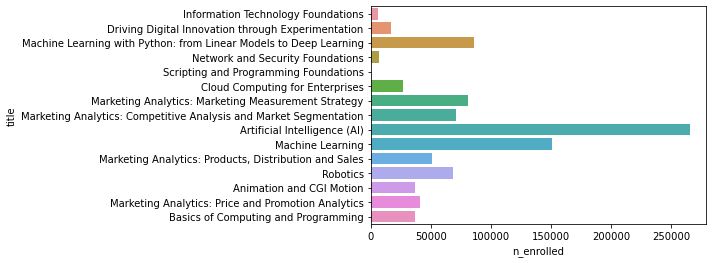

In [53]:
sns.barplot(x='n_enrolled',y='title',data=comp_sci_query)

<AxesSubplot:xlabel='price', ylabel='title'>

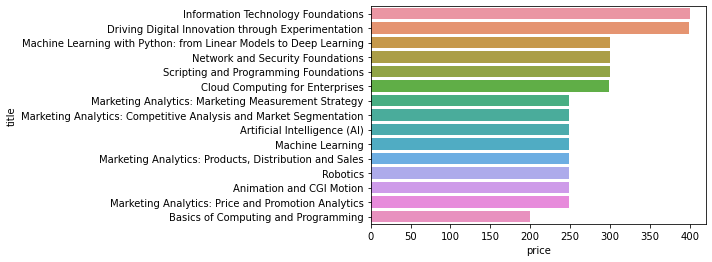

In [55]:
sns.barplot(x='price',y='title',data=comp_sci_query)

In [57]:
#Subject : Data Analysis & Statistics
data_analysis_total = pd.read_sql('''Select sum(n_enrolled) as tot_enrolled, count(title) as num_courses,
                                        avg(price) as avg_course_purchase, min(price) as min_course_purchase,
                                        max(price) as max_course_purchase from edx_courses where subject == 'Data Analysis & Statistics'
                                        order by price desc''',edx_conn)
data_analysis_total

,tot_enrolled,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,4264412,72,92.63875,25.0,350.0


In [58]:
#Subject : Computer Science
comp_sci_total = pd.read_sql('''Select sum(n_enrolled) as tot_enrolled, count(title) as num_courses,
                                        avg(price) as avg_course_purchase, min(price) as min_course_purchase,
                                        max(price) as max_course_purchase from edx_courses where subject == 'Computer Science'
                                        order by price desc''',edx_conn)
comp_sci_total

,tot_enrolled,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,12447737,166,125.012048,49.0,399.6


In [59]:
#Subject : Business & Management
business_total = pd.read_sql('''Select sum(n_enrolled) as tot_enrolled, count(title) as num_courses,
                                        avg(price) as avg_course_purchase, min(price) as min_course_purchase,
                                        max(price) as max_course_purchase from edx_courses where subject == 'Business & Management'
                                        order by price desc''',edx_conn)
business_total

,tot_enrolled,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,7076563,164,132.542683,5.0,399.0


In [60]:
#Subject: Engineering
engineering_total = pd.read_sql('''Select sum(n_enrolled) as tot_enrolled, count(title) as num_courses,
                                        avg(price) as avg_course_purchase, min(price) as min_course_purchase,
                                        max(price) as max_course_purchase from edx_courses where subject == 'Engineering'
                                        order by price desc''',edx_conn)
engineering_total

,tot_enrolled,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,1396839,58,116.982759,25.0,299.0


In [61]:
#Subject and subject PCT
by_subject = pd.read_sql('''Select subject,count(subject) as subject_count,
                            100 * count(subject) / (Select count(*) from edx_courses) as subject_pct
                            from edx_courses group by subject order by subject_pct desc limit 10''',edx_conn)

In [62]:
by_subject

,subject,subject_count,subject_pct
0,Computer Science,166,17
1,Business & Management,164,16
2,Data Analysis & Statistics,72,7
3,Humanities,64,6
4,Social Sciences,51,5
5,Engineering,58,5
6,Economics & Finance,46,4
7,Communication,39,4
8,Medicine,31,3
9,Math,31,3


<AxesSubplot:xlabel='subject_pct', ylabel='subject'>

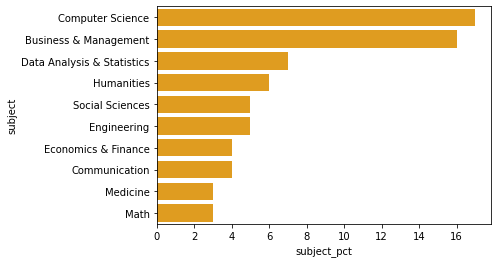

In [65]:
sns.barplot(x='subject_pct',y='subject',data=by_subject,color='orange')

In [66]:
#Price and price PCT
by_price_query = by_subject = pd.read_sql('''Select price,count(price) as price_count,
                            100 * count(price) / (Select count(*) from edx_courses) as price_pct
                            from edx_courses group by price order by price_pct desc limit 10''',edx_conn)
by_price_query

,price,price_count,price_pct
0,49.0,270,27
1,99.0,137,14
2,50.0,96,9
3,199.0,85,8
4,149.0,78,8
5,25.0,49,5
6,150.0,30,3
7,139.0,33,3
8,249.0,26,2
9,79.0,21,2


<AxesSubplot:xlabel='price', ylabel='price_pct'>

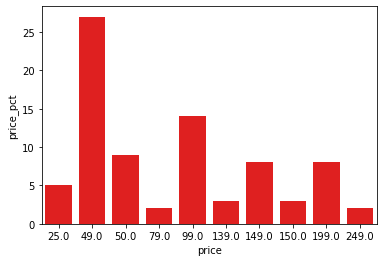

In [68]:
sns.barplot(x='price',y='price_pct',data=by_price_query,color='red')

In [72]:
# Average price per subject
avg_price_per_subject_query = pd.read_sql('''Select subject,avg(price) as avg_price_subject from 
                                                edx_courses where price group by subject order by avg_price_subject desc limit 10''',edx_conn)
avg_price_per_subject_query

,subject,avg_price_subject
0,Energy & Earth Sciences,147.250000
1,Business & Management,132.542683
2,Computer Science,125.012048
3,Literature,121.500000
4,Engineering,116.982759
5,Law,112.000000
6,Art & Culture,110.916667
7,Electronics,103.714286
8,Medicine,101.387097
9,Design,98.750000


In [73]:
avg_price_per_subject_query = avg_price_per_subject_query.round(2)

In [74]:
avg_price_per_subject_query

,subject,avg_price_subject
0,Energy & Earth Sciences,147.25
1,Business & Management,132.54
2,Computer Science,125.01
3,Literature,121.50
4,Engineering,116.98
5,Law,112.00
6,Art & Culture,110.92
7,Electronics,103.71
8,Medicine,101.39
9,Design,98.75


<AxesSubplot:xlabel='avg_price_subject', ylabel='subject'>

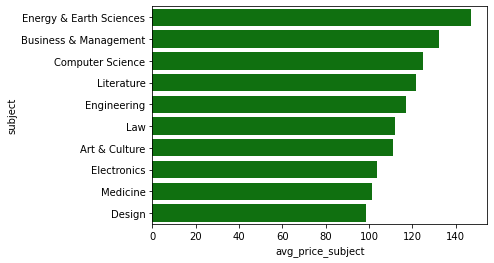

In [77]:
sns.barplot(x='avg_price_subject',y='subject',data=avg_price_per_subject_query,color='green')

In [78]:
# Total enrollment per subject
enrollment_per_subject = pd.read_sql('''Select subject,sum(n_enrolled) as tot_enrolled
                                        from edx_courses group by subject order by tot_enrolled desc limit 10''',edx_conn)

enrollment_per_subject

,subject,tot_enrolled
0,Computer Science,12447737
1,Business & Management,7076563
2,Communication,4641327
3,Data Analysis & Statistics,4264412
4,Humanities,3504140
5,Social Sciences,1844379
6,Biology & Life Sciences,1763832
7,Engineering,1396839
8,Language,1063257
9,Medicine,989765


<AxesSubplot:xlabel='tot_enrolled', ylabel='subject'>

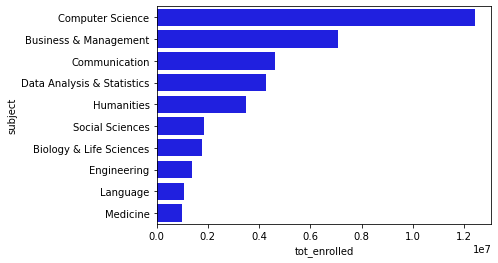

In [80]:
#Bar plot of tot_enrolled and subject
sns.barplot(x='tot_enrolled',y='subject',data=enrollment_per_subject,color='blue')